### This file was run on google colab

In [0]:
import h5py
import numpy as np

In [0]:
import tensorflow as tf

In [0]:
tf.test.gpu_device_name()

''

In [0]:
from keras.utils import np_utils
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from skimage import color
from skimage import io
from sklearn.model_selection import train_test_split

In [0]:
import keras
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape,BatchNormalization

In [0]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [0]:
f = h5py.File('SVHN_single_grey1.h5', 'r')

In [0]:
list(f.keys())


['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [0]:
#h5 dataset to numpy array
X_test = f['X_test'][:]
X_train = f['X_train'][:]
X_val = f['X_val'][:]
y_test = f['y_test'][:]
y_train = f['y_train'][:]
y_val = f['y_val'][:]


In [0]:
print("X_test shape..",X_test.shape)
print("X_train shape..",X_train.shape)
print("X_val shape..",X_val.shape)
print("y_test shape..",y_test.shape)
print("y_train shape..",y_train.shape)
print("y_val shape..",y_val.shape)

X_test shape.. (18000, 32, 32)
X_train shape.. (42000, 32, 32)
X_val shape.. (60000, 32, 32)
y_test shape.. (18000,)
y_train shape.. (42000,)
y_val shape.. (60000,)


In [0]:
#numpy to 3D matrix
x_train2 = X_train.reshape(X_train.shape[0], 32, 32, 1).astype('float32')
x_test2 = X_test.reshape(X_test.shape[0], 32, 32, 1).astype('float32')
x_val2 = X_val.reshape(X_val.shape[0], 32, 32, 1).astype('float32')
y_train2 = y_train.reshape(y_train.shape[0], 1).astype('float32')
y_test2 = y_test.reshape(y_test.shape[0],1).astype('float32')
y_val2 = y_val.reshape(y_val.shape[0],1).astype('float32')

In [0]:
print("X_test shape..",x_test2.shape)
print("X_train shape..",x_train2.shape)
print("X_val shape..",x_val2.shape)
print("y_test shape..",y_test2.shape)
print("y_train shape..",y_train2.shape)
print("y_val shape..",y_val2.shape)

X_test shape.. (18000, 32, 32, 1)
X_train shape.. (42000, 32, 32, 1)
X_val shape.. (60000, 32, 32, 1)
y_test shape.. (18000, 1)
y_train shape.. (42000, 1)
y_val shape.. (60000, 1)


In [0]:
#converting y to categorical
y_train2 = np_utils.to_categorical(y_train, 10)
y_test2 = np_utils.to_categorical(y_test, 10)

In [0]:
# normalizing the X
x_train3 = X_train/255
x_test3 = X_test/255

In [0]:
print(x_train3.shape)
print(y_train2.shape)

(42000, 32, 32)
(42000, 10)


In [0]:
#plot the images
def plot_images(img, labels, nrows, ncols):
    """ Plot nrows x ncols images
    """
    fig, axes = plt.subplots(nrows, ncols)
    for i, ax in enumerate(axes.flat): 
        if img[i].shape == (32, 32, 3):
            ax.imshow(img[i])
        else:
            ax.imshow(img[i,:,:,0])
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(labels[i])

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


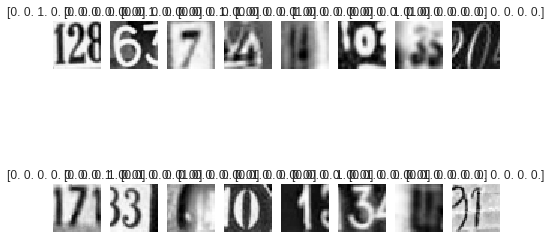

In [0]:
# Plot some training set images
plot_images(x_train2, y_train2, 2, 8)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


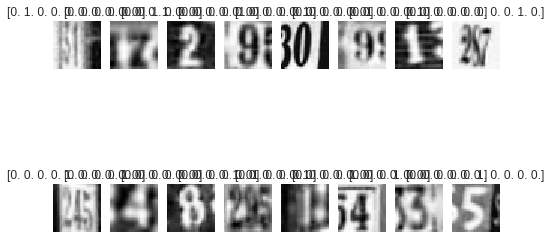

In [0]:
# Plot some test set images
plot_images(x_test2, y_test2, 2, 8)

In [0]:
#KNN initialization parameters

kVals = range(1, 20, 2)
accuracies = []

In [0]:
X_train_reshaped = np.reshape(X_train,(42000,1024))
X_test_reshaped = np.reshape(X_test,(18000,1024))

In [0]:
for k in range(1, 20, 2):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_reshaped, y_train)
    score = model.score(X_test_reshaped, y_test)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

k=1, accuracy=45.92%
k=3, accuracy=46.18%
k=5, accuracy=49.02%
k=7, accuracy=50.71%
k=9, accuracy=51.24%
k=11, accuracy=51.80%
k=13, accuracy=52.11%
k=15, accuracy=52.36%
k=17, accuracy=52.87%
k=19, accuracy=52.72%


In [0]:
k_data = [1,3,5,7,9,11,13,15,17,19]
df = pd.DataFrame(accuracies)
df.rename(columns={0 : 'KNN-Accuracy'}, inplace=True)
df["k"] = k_data
df.head()

,KNN-Accuracy,k
0,0.459167,1
1,0.461778,3
2,0.490167,5
3,0.507056,7
4,0.512444,9


In [0]:
# re-train our classifier using the best k value and predict the labels of the
# test data

model = KNeighborsClassifier(n_neighbors=kVals[i])
model.fit(X_train_reshaped, y_train)
predictions = model.predict(X_test_reshaped)

In [0]:
#final classification matrix

print ("Confusion matrix")
print(confusion_matrix(y_test,predictions))

print("test data evaluation")
print(classification_report(y_test, predictions))

Confusion matrix
[[1274   66   34   35   46   45   98   39   78   99]
 [  99 1335   55   95   69   36   31   46   26   36]
 [  94  226 1000   95   44   37   35  141   52   79]
 [ 129  260  135  736   47  160   36   57   94   65]
 [ 105  249   41   60 1177   16   54   19   43   48]
 [ 165  172   47  269   58  693  137   31  119   77]
 [ 319  128   40   67  135  116  744   21  202   60]
 [ 100  209  110   88   27   37   37 1128   24   48]
 [ 247  119   68  114   94  115  265   25  654  111]
 [ 323  142   71   89   71   93   55   73  111  776]]
EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.45      0.70      0.55      1814
           1       0.46      0.73      0.56      1828
           2       0.62      0.55      0.59      1803
           3       0.45      0.43      0.44      1719
           4       0.67      0.65      0.66      1812
           5       0.51      0.39      0.44      1768
           6       0.50      0.41      0.45   

In [0]:
import matplotlib.pyplot as plt

In [0]:
#basic NN model
model =Sequential ()
model.add(Reshape((1024,),input_shape=(32,32,)))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
#model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train3,y_train2,validation_data=(x_test3,y_test2),epochs=30,batch_size = 200)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 3s 68us/step - loss: 2.2446 - acc: 0.1627 - val_loss: 2.0179 - val_acc: 0.2960
Epoch 2/30
42000/42000 [==============================] - 2s 51us/step - loss: 1.7012 - acc: 0.4340 - val_loss: 1.4729 - val_acc: 0.5308
Epoch 3/30
42000/42000 [==============================] - 2s 51us/step - loss: 1.3650 - acc: 0.5694 - val_loss: 1.2574 - val_acc: 0.6142
Epoch 4/30
42000/42000 [==============================] - 2s 51us/step - loss: 1.2055 - acc: 0.6282 - val_loss: 1.1229 - val_acc: 0.6604
Epoch 5/30
42000/42000 [==============================] - 2s 52us/step - loss: 1.1138 - acc: 0.6606 - val_loss: 1.0599 - val_acc: 0.6758
Epoch 6/30
42000/42000 [==============================] - 2s 53us/step - loss: 1.0567 - acc: 0.6754 - val_loss: 1.0289 - val_acc: 0.6864
Epoch 7/

In [0]:
accuracy = model.evaluate(x=x_test3,y=y_test2)
print("Accuracy: ", accuracy[1]*100)

18000/18000 [==============================] - 1s 41us/step
Accuracy:  79.01666666666667


In [0]:
from keras import losses

In [0]:
df = []

### 1.SGD optimizer 
#### with loss functions as a. categorical cross entropy
#### with and without batch normalization
#### with and without drop out layer.

In [0]:
#without drop-out and without batch normalization with 2 types of losses.
def create_model(loss_type,optimizer='SGD'): 
  model =Sequential ()
  model.add(Reshape((1024,),input_shape=(32,32,)))
  model.add(Dense(300, activation='relu'))
  model.add(Dense(200, activation='relu'))
  model.add(Dense(200, activation='relu'))
  model.add(Dense(250, activation='relu'))
  #model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss=loss_type, optimizer=optimizer, metrics=['accuracy'])
  return model

In [0]:
#categorical crossentropy without batch normalization
model1 =create_model('categorical_crossentropy')
model1_result = model1.fit(x_train3,y_train2,validation_data=(x_test3,y_test2),epochs=30,batch_size = 200)

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 4s 92us/step - loss: 2.2991 - acc: 0.1268 - val_loss: 2.2930 - val_acc: 0.1428
Epoch 2/30
42000/42000 [==============================] - 4s 90us/step - loss: 2.2890 - acc: 0.1694 - val_loss: 2.2840 - val_acc: 0.1871
Epoch 3/30
42000/42000 [==============================] - 4s 90us/step - loss: 2.2790 - acc: 0.2073 - val_loss: 2.2725 - val_acc: 0.2386
Epoch 4/30
42000/42000 [==============================] - 4s 89us/step - loss: 2.2658 - acc: 0.2415 - val_loss: 2.2571 - val_acc: 0.2589
Epoch 5/30
42000/42000 [==============================] - 4s 91us/step - loss: 2.2473 - acc: 0.2761 - val_loss: 2.2333 - val_acc: 0.2931
Epoch 6/30
42000/42000 [==============================] - 4s 91us/step - loss: 2.2179 - acc: 0.3053 - val_loss: 2.1962 - val_acc: 0.2994
Epoch 7/30
42000/42000 [==============================] - 4s 91us/step - loss: 2.1707 - acc: 0.3265 - val_loss: 2.1359 - val_acc

In [0]:
#SGD with batch normalization
def create_model_withBN(loss_type,optimizer='SGD'): 
  model =Sequential ()
  model.add(Reshape((1024,),input_shape=(32,32,)))
  model.add(BatchNormalization())
  model.add(Dense(300, activation='relu'))
  model.add(Dense(200, activation='relu'))
  model.add(Dense(200, activation='relu'))
  model.add(Dense(250, activation='relu'))
  #model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss=loss_type, optimizer=optimizer, metrics=['accuracy'])
  return model

In [0]:
#categorical crossentropy  batch normalization
model3 =create_model_withBN('categorical_crossentropy')
model3_result = model3.fit(x_train3,y_train2,validation_data=(x_test3,y_test2),epochs=30,batch_size = 200)

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 6s 137us/step - loss: 2.2779 - acc: 0.1549 - val_loss: 2.2208 - val_acc: 0.2212
Epoch 2/30
42000/42000 [==============================] - 5s 122us/step - loss: 2.1351 - acc: 0.2872 - val_loss: 2.0172 - val_acc: 0.3496
Epoch 3/30
42000/42000 [==============================] - 5s 123us/step - loss: 1.8610 - acc: 0.4039 - val_loss: 1.6899 - val_acc: 0.4679
Epoch 4/30
42000/42000 [==============================] - 5s 122us/step - loss: 1.5481 - acc: 0.5175 - val_loss: 1.4149 - val_acc: 0.5669
Epoch 5/30
42000/42000 [==============================] - 5s 123us/step - loss: 1.3210 - acc: 0.5965 - val_loss: 1.2288 - val_acc: 0.6306
Epoch 6/30
42000/42000 [==============================] - 5s 125us/step - loss: 1.1667 - acc: 0.6458 - val_loss: 1.1140 - val_acc: 0.6647
Epoch 7/30
42000/42000 [==============================] - 5s 123us/step - loss: 1.0580 - acc: 0.6812 - val_loss: 1.0190 - 

In [0]:
#with dropout and with batchnormalization
def create_model_withdropout(loss_type,optimizer='SGD'): 
  model =Sequential ()
  model.add(Reshape((1024,),input_shape=(32,32,)))
  model.add(BatchNormalization())
  model.add(Dense(300, activation='relu'))
  model.add(Dense(200, activation='relu'))
  model.add(Dense(200, activation='relu'))
  model.add(Dense(250, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss=loss_type, optimizer=optimizer, metrics=['accuracy'])
  return model

In [0]:
#categorical crossentropy  batch normalization and drop out
model5 =create_model_withdropout('categorical_crossentropy')
model5_result = model5.fit(x_train3,y_train2,validation_data=(x_test3,y_test2),epochs=30,batch_size = 200)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 6s 146us/step - loss: 2.3030 - acc: 0.1325 - val_loss: 2.2285 - val_acc: 0.2319
Epoch 2/30
42000/42000 [==============================] - 5s 124us/step - loss: 2.1942 - acc: 0.2105 - val_loss: 2.0908 - val_acc: 0.3331
Epoch 3/30
42000/42000 [==============================] - 5s 123us/step - loss: 2.0222 - acc: 0.2981 - val_loss: 1.8448 - val_acc: 0.4390
Epoch 4/30
42000/42000 [==============================] - 5s 124us/step - loss: 1.7775 - acc: 0.3978 - val_loss: 1.5646 - val_acc: 0.5310
Epoch 5/30
42000/42000 [==============================] - 5s 122us/step - loss: 1.5454 - acc: 0.4857 - val_loss: 1.3499 - val_acc: 0.5879
Epoch 6/30
42000/42000 [==============================] - 5s 130us/step - loss: 1.3776 - acc: 0.5465 - val_loss: 1.2050 - val_acc: 0.6381
Epoch 7

In [0]:
#KL-divergence with batch normalization and drop out
model6 =create_model_withdropout(losses.kullback_leibler_divergence)
model6_result = model6.fit(x_train3,y_train2,validation_data=(x_test3,y_test2),epochs=30,batch_size = 200)

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 9s 207us/step - loss: 1.5192 - acc: 0.4805 - val_loss: 0.9880 - val_acc: 0.6879
Epoch 2/30
42000/42000 [==============================] - 6s 140us/step - loss: 0.9392 - acc: 0.7070 - val_loss: 0.8200 - val_acc: 0.7489
Epoch 3/30
42000/42000 [==============================] - 6s 141us/step - loss: 0.7889 - acc: 0.7576 - val_loss: 0.7377 - val_acc: 0.7742
Epoch 4/30
42000/42000 [==============================] - 6s 142us/step - loss: 0.6933 - acc: 0.7847 - val_loss: 0.6957 - val_acc: 0.7857
Epoch 5/30
42000/42000 [==============================] - 6s 144us/step - loss: 0.6317 - acc: 0.8058 - val_loss: 0.6616 - val_acc: 0.8006
Epoch 6/30
42000/42000 [==============================] - 6s 145us/step - loss: 0.5842 - acc: 0.8180 - val_loss: 0.6746 - val_acc: 0.7947
Epoch 7/30
42000/42000 [==============================] - 6s 144us/step - loss: 0.5379 - acc: 0.8328 - val_loss: 0.6579 - 

In [0]:
columns =['optimizer','loss function','batch_normalization','drop_out layer','training accuracy','testing accuracy','training error','testing error']

In [0]:
rows_list=[]

In [0]:
rows_list.append(['sgd','cross_entropy','No','No',model1_result.history['acc'][29],model1_result.history['val_acc'][29],model1_result.history['loss'][29],model1_result.history['val_loss'][29]])

In [0]:
rows_list.append(['sgd','Kl-divergence','No','No',model2_result.history['acc'][29],model2_result.history['val_acc'][29],model2_result.history['loss'][29],model2_result.history['val_loss'][29]])
rows_list.append(['sgd','cross_entropy','Yes','No',model3_result.history['acc'][29],model3_result.history['val_acc'][29],model3_result.history['loss'][29],model3_result.history['val_loss'][29]])
rows_list.append(['sgd','Kl-divergence','YEs','No',model4_result.history['acc'][29],model4_result.history['val_acc'][29],model4_result.history['loss'][29],model4_result.history['val_loss'][29]])
rows_list.append(['sgd','cross_entropy','No','Yes',model5_result.history['acc'][29],model5_result.history['val_acc'][29],model5_result.history['loss'][29],model5_result.history['val_loss'][29]])
rows_list.append(['sgd','Kl-divergence','No','Yes',model6_result.history['acc'][29],model6_result.history['val_acc'][29],model6_result.history['loss'][29],model6_result.history['val_loss'][29]])

In [0]:
sgd_history = pd.DataFrame(rows_list,columns = columns)

In [0]:
sgd_history

,optimizer,loss function,batch_normalization,drop_out layer,training accuracy,testing accuracy,training error,testing error
0,sgd,cross_entropy,No,No,0.687119,0.693056,1.010566,0.998912
1,sgd,Kl-divergence,No,No,0.702190,0.707833,0.972805,0.965735
2,sgd,cross_entropy,Yes,No,0.858595,0.817167,0.465926,0.644047
3,sgd,Kl-divergence,YEs,No,0.857524,0.813111,0.462631,0.648903
4,sgd,cross_entropy,No,Yes,0.836738,0.820722,0.539858,0.614783
5,sgd,Kl-divergence,No,Yes,0.916500,0.839611,0.276361,0.620672


In [0]:
#best method is SGD with kl-divergence with batch normalization and with drop out layer

### 2.Adam optimizer

### with loss functions as a. categorical cross entropy b. KL-divergence
#### with and without batch normalization
#### with and without drop out layer.

In [0]:
def create_model(loss_type,optimizer='adam'): 
  model =Sequential ()
  model.add(Reshape((1024,),input_shape=(32,32,)))
  model.add(Dense(300, activation='relu'))
  model.add(Dense(200, activation='relu'))
  model.add(Dense(200, activation='relu'))
  model.add(Dense(250, activation='relu'))
  #model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss=loss_type, optimizer=optimizer, metrics=['accuracy'])
  return model

In [0]:
#categorical crossentropy without batch normalization
adam1 =create_model('categorical_crossentropy')
adam1_result = adam1.fit(x_train3,y_train2,validation_data=(x_test3,y_test2),epochs=30,batch_size = 200)

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 6s 141us/step - loss: 2.0559 - acc: 0.2399 - val_loss: 1.4546 - val_acc: 0.5034
Epoch 2/30
42000/42000 [==============================] - 5s 109us/step - loss: 1.3499 - acc: 0.5470 - val_loss: 1.2772 - val_acc: 0.5853
Epoch 3/30
42000/42000 [==============================] - 5s 109us/step - loss: 1.1543 - acc: 0.6294 - val_loss: 1.0452 - val_acc: 0.6729
Epoch 4/30
42000/42000 [==============================] - 5s 114us/step - loss: 1.0476 - acc: 0.6680 - val_loss: 1.0109 - val_acc: 0.6805
Epoch 5/30
42000/42000 [==============================] - 5s 116us/step - loss: 0.9638 - acc: 0.6961 - val_loss: 1.0074 - val_acc: 0.6829
Epoch 6/30
42000/42000 [==============================] - 5s 108us/step - loss: 0.9006 - acc: 0.7153 - val_loss: 0.8705 - val_acc: 0.7274
Epoch 7/30
42000/42000 [==============================] - 5s 109us/step - loss: 0.8561 - acc: 0.7291 - val_loss: 0.8804 - 

In [0]:
#KL-divergence without batch normalization
adam2 =create_model(losses.kullback_leibler_divergence)
adam2_result = adam2.fit(x_train3,y_train2,validation_data=(x_test3,y_test2),epochs=30,batch_size = 200)

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 6s 135us/step - loss: 2.1133 - acc: 0.2003 - val_loss: 1.6944 - val_acc: 0.3885
Epoch 2/30
42000/42000 [==============================] - 5s 108us/step - loss: 1.4140 - acc: 0.5190 - val_loss: 1.2329 - val_acc: 0.5952
Epoch 3/30
42000/42000 [==============================] - 5s 108us/step - loss: 1.1872 - acc: 0.6157 - val_loss: 1.1050 - val_acc: 0.6391
Epoch 4/30
42000/42000 [==============================] - 5s 108us/step - loss: 1.0402 - acc: 0.6699 - val_loss: 1.0301 - val_acc: 0.6716
Epoch 5/30
42000/42000 [==============================] - 4s 107us/step - loss: 0.9708 - acc: 0.6909 - val_loss: 0.9888 - val_acc: 0.6884
Epoch 6/30
42000/42000 [==============================] - 5s 109us/step - loss: 0.9020 - acc: 0.7133 - val_loss: 0.8802 - val_acc: 0.7252
Epoch 7/30
42000/42000 [==============================] - 5s 110us/step - loss: 0.8319 - acc: 0.7383 - val_loss: 0.9064 - 

In [0]:
def create_model_withBatchNorm(loss_type,optimizer='adam'): 
  model =Sequential ()
  model.add(Reshape((1024,),input_shape=(32,32,)))
  model.add(BatchNormalization())
  model.add(Dense(300, activation='relu'))
  model.add(Dense(200, activation='relu'))
  model.add(Dense(200, activation='relu'))
  model.add(Dense(250, activation='relu'))
  #model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss=loss_type, optimizer=optimizer, metrics=['accuracy'])
  return model

In [0]:
adam3 =create_model_withBatchNorm('categorical_crossentropy')
adam3_result = adam3.fit(x_train3,y_train2,validation_data=(x_test3,y_test2),epochs=30,batch_size = 200)

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 7s 177us/step - loss: 1.3172 - acc: 0.5639 - val_loss: 0.9210 - val_acc: 0.7108
Epoch 2/30
42000/42000 [==============================] - 6s 141us/step - loss: 0.8373 - acc: 0.7377 - val_loss: 0.7847 - val_acc: 0.7614
Epoch 3/30
42000/42000 [==============================] - 6s 141us/step - loss: 0.7003 - acc: 0.7822 - val_loss: 0.6916 - val_acc: 0.7907
Epoch 4/30
42000/42000 [==============================] - 6s 139us/step - loss: 0.6141 - acc: 0.8085 - val_loss: 0.6805 - val_acc: 0.7941
Epoch 5/30
42000/42000 [==============================] - 6s 139us/step - loss: 0.5567 - acc: 0.8251 - val_loss: 0.6634 - val_acc: 0.8012
Epoch 6/30
42000/42000 [==============================] - 6s 140us/step - loss: 0.5161 - acc: 0.8369 - val_loss: 0.6245 - val_acc: 0.8155
Epoch 7/30
42000/42000 [==============================] - 6s 141us/step - loss: 0.4672 - acc: 0.8515 - val_loss: 0.6241 - 

In [0]:
def create_model_withdropout(loss_type,optimizer='adam'): 
  model =Sequential ()
  model.add(Reshape((1024,),input_shape=(32,32,)))
  model.add(BatchNormalization())
  model.add(Dense(300, activation='relu'))
  model.add(Dense(200, activation='relu'))
  model.add(Dense(200, activation='relu'))
  model.add(Dense(250, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss=loss_type, optimizer=optimizer, metrics=['accuracy'])
  return model

In [0]:
adam5 =create_model_withdropout('categorical_crossentropy')
adam5_result = adam5.fit(x_train3,y_train2,validation_data=(x_test3,y_test2),epochs=30,batch_size = 200)

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 8s 189us/step - loss: 1.5374 - acc: 0.4729 - val_loss: 0.9937 - val_acc: 0.6871
Epoch 2/30
42000/42000 [==============================] - 6s 152us/step - loss: 0.9507 - acc: 0.7031 - val_loss: 0.8253 - val_acc: 0.7478
Epoch 3/30
42000/42000 [==============================] - 6s 144us/step - loss: 0.7920 - acc: 0.7530 - val_loss: 0.7448 - val_acc: 0.7737
Epoch 4/30
42000/42000 [==============================] - 6s 142us/step - loss: 0.7082 - acc: 0.7807 - val_loss: 0.6912 - val_acc: 0.7896
Epoch 5/30
42000/42000 [==============================] - 6s 143us/step - loss: 0.6400 - acc: 0.8009 - val_loss: 0.6472 - val_acc: 0.8072
Epoch 6/30
42000/42000 [==============================] - 6s 145us/step - loss: 0.5911 - acc: 0.8160 - val_loss: 0.6334 - val_acc: 0.8129
Epoch 7/30
42000/42000 [==============================] - 6s 147us/step - loss: 0.5498 - acc: 0.8287 - val_loss: 0.6273 - 

In [0]:
#best model(adam optimizer with categorical cross entropy)
best_model =Sequential ()
best_model.add(Reshape((1024,),input_shape=(32,32,)))
best_model.add(BatchNormalization())
best_model.add(Dense(300, activation='relu'))
best_model.add(Dense(200, activation='relu'))
best_model.add(Dense(200, activation='relu'))
best_model.add(Dense(250, activation='relu'))
best_model.add(Dropout(0.5))
best_model.add(Dense(10, activation='softmax'))
best_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = best_model.fit(x_train3,y_train2,validation_data=(x_test3,y_test2),epochs=30,batch_size = 200)

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 9s 226us/step - loss: 1.5402 - acc: 0.4748 - val_loss: 0.9754 - val_acc: 0.6960
Epoch 2/30
42000/42000 [==============================] - 6s 146us/step - loss: 0.9574 - acc: 0.7016 - val_loss: 0.8502 - val_acc: 0.7406
Epoch 3/30
42000/42000 [==============================] - 6s 146us/step - loss: 0.8009 - acc: 0.7531 - val_loss: 0.7374 - val_acc: 0.7744
Epoch 4/30
42000/42000 [==============================] - 6s 146us/step - loss: 0.7025 - acc: 0.7818 - val_loss: 0.6974 - val_acc: 0.7862
Epoch 5/30
42000/42000 [==============================] - 6s 144us/step - loss: 0.6356 - acc: 0.8026 - val_loss: 0.6506 - val_acc: 0.8061
Epoch 6/30
42000/42000 [==============================] - 6s 143us/step - loss: 0.5859 - acc: 0.8156 - val_loss: 0.6343 - val_acc: 0.8101
Epoch 7/30
42000/42000 [==============================] - 6s 145us/step - loss: 0.5572 - acc: 0.8267 - val_loss: 0.6010 - 

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [0]:
y_pred=model.predict(x_test3)

In [0]:
#few predicted values
y_pred[0:5]

array([[4.3145615e-01, 3.2689024e-02, 1.1899723e-01, 1.8163582e-02,
        3.8996976e-02, 2.5002321e-02, 7.2685473e-02, 2.6946986e-02,
        9.1808453e-02, 1.4325374e-01],
       [1.0526397e-05, 3.4574934e-04, 6.3356447e-01, 4.9037710e-03,
        3.1317368e-06, 3.4350069e-04, 6.3813687e-04, 3.5936499e-01,
        5.9940497e-04, 2.2627802e-04],
       [9.8963083e-06, 1.8777898e-04, 9.9852198e-01, 2.2228135e-04,
        1.6334666e-04, 5.3643289e-06, 1.9800707e-05, 3.5244777e-04,
        3.4836965e-04, 1.6879626e-04],
       [6.6873595e-06, 4.0189488e-07, 1.0879387e-06, 3.4806453e-07,
        1.9636945e-08, 1.9299280e-07, 7.0161796e-09, 1.3289980e-09,
        2.1578764e-05, 9.9996972e-01],
       [9.1274810e-01, 2.4450617e-06, 2.4106396e-06, 4.2595221e-07,
        2.5368961e-06, 7.2338535e-06, 1.4412369e-03, 1.2285705e-06,
        1.2704778e-02, 7.3089622e-02]], dtype=float32)

In [0]:
matrix = confusion_matrix(y_test2.argmax(axis=1), y_pred.argmax(axis=1))
print("Confusion Matrix")
print(matrix)

# Get Classification Report
report = classification_report(np.argmax(y_test2, axis=1), np.argmax(y_pred, axis=1))
print(report)

Confusion Matrix
[[1480   28   13   40   29   11   37   20   46  110]
 [  35 1441   25   89   55   19   23   50   45   46]
 [  19   26 1428   89   25   19   10   72   38   77]
 [  22   31   39 1321   11  142   18   28   53   54]
 [  26   34   23   44 1484   30   64   11   34   62]
 [  24   16   12  102   11 1412   60    6   48   77]
 [  65   26   13   28   47   73 1449    7   84   40]
 [  28   61   89   69   12   19   16 1440   18   56]
 [  43   41   26   62   17   63  108   10 1319  123]
 [  63   27   16   59   27   64   11   26   62 1449]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1814
           1       0.83      0.79      0.81      1828
           2       0.85      0.79      0.82      1803
           3       0.69      0.77      0.73      1719
           4       0.86      0.82      0.84      1812
           5       0.76      0.80      0.78      1768
           6       0.81      0.79      0.80      1832
           7       

In [0]:
##Comparison of CNN with and without batch normalization
#1. Batch normalization has reduced overfitting effect as difference between training acc and
#validation acc came down. 
#2. Batch normalization provided only a small marginal increase in performance. (0.826 vs 0.874)

##Comparison of final CNN with KNN model.
#1. The Acurracy is high for CNN as expected. CNN extracts features through convolution layer 
#whereas KNN processes the raw pixel data
#2. Memory requirement is high for KNN as expected. When kfold cross validation was run from laptop it 
#ran out of memory. Rerun the code from desktop system to complete it. 
#3. Training time was also high for KNN as expected. It took hours to complete kfold
#cross validation. 